In [1]:
# make a comparison of just the different blood groups
# Single Var pred : Only Blood Type and no other features-
# Pick the 5 and 10 best features and 

In [2]:
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.svm import SVC

from sklearn.model_selection import KFold, cross_val_score

import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
unneeded_data = ['Place_of_isolation','Patient_In','Patient_out']
catigorical_data=['Blood_Group','CONTROL_blood_group','Risk_Factor']
labels = ['Severeity','Outcome']
droped_col = unneeded_data+catigorical_data+labels

In [4]:
df = pd.read_csv("Covid-19_dataset.csv",header=1)


df['is_Male'] = pd.get_dummies(df['Gender'])['MALE']#one hot encoding gender so male = #1 and female = 0

blood_types = pd.get_dummies(df['Blood_Group']).columns
blood_group_columns = pd.get_dummies(df[['Blood_Group','CONTROL_blood_group']]).columns


df = pd.concat([df, pd.get_dummies(df[['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type']])], axis=1)



df = df.drop(['Blood_Group','CONTROL_blood_group','Risk_Factor','Infection_type','Gender','Place_of_isolation','Patient_In','Patient_out'],axis=1)

columns = df.columns



# getting rid of blank values
print("before",df.shape)
for name in columns:
    df = df[df[name] != " "]
    df = df.dropna()
    
label_Severeity = df['Severeity'] #Severeity vs Outcome
label_Outcome = df['Outcome']
df = df.drop(['Severeity','Outcome'],axis=1)


df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))#strings to numeric
all_columns = df.columns
# df = df.reset_index()

print("after",df.shape)





before (5668, 57)
after (5641, 55)


In [5]:
blood_type_labels =[]
control_blood_type_labels = []
for i in blood_group_columns:
    if("CONTROL_" in i):
        control_blood_type_labels.append(i)
    else:
        blood_type_labels.append(i)

In [6]:

df_CONTROL_blood_data = copy.deepcopy(df[control_blood_type_labels])

In [7]:
df_CONTROL_blood_data

,CONTROL_blood_group_A+,CONTROL_blood_group_A-,CONTROL_blood_group_AB+,CONTROL_blood_group_AB-,CONTROL_blood_group_B+,CONTROL_blood_group_B-,CONTROL_blood_group_O+,CONTROL_blood_group_O-
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
5663,0,0,0,0,0,0,1,0
5664,0,0,0,0,1,0,0,0
5665,0,0,0,0,0,0,1,0
5666,1,0,0,0,0,0,0,0


In [8]:
df_CONTROL_blood_data

,CONTROL_blood_group_A+,CONTROL_blood_group_A-,CONTROL_blood_group_AB+,CONTROL_blood_group_AB-,CONTROL_blood_group_B+,CONTROL_blood_group_B-,CONTROL_blood_group_O+,CONTROL_blood_group_O-
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
5663,0,0,0,0,0,0,1,0
5664,0,0,0,0,1,0,0,0
5665,0,0,0,0,0,0,1,0
5666,1,0,0,0,0,0,0,0


In [9]:
# df_CONTROL_blood_data[df_CONTROL_blood_data['Blood_Group_A+']== 1]

In [10]:


# def CrossValAndAUC(model,K=10): 
#     plt.figure()
#     %matplotlib inline

#     for bt in control_blood_type_labels:
#         Blood_Data = df_CONTROL_blood_data[df_CONTROL_blood_data[bt]== 1]
#         y = label_Outcome[df_CONTROL_blood_data[bt]== 1]


# #         crossVal_model = copy.deepcopy(model)
# #         #10 Fold cross validation
# #         kf = KFold(n_splits=K, shuffle=True)
# #         scores = cross_val_score(crossVal_model, Blood_Data, y, cv=kf)
# #         print(f" {bt} | {K} Forld cross validation average: {scores.mean()}")

#         model.fit(Blood_Data,y)




#         # Training ONLY on the training set to get AUC:
#         tempModel = copy.deepcopy(model)
#         model.fit(Blood_Data, y)
#         predict = model.predict(Blood_Data)
#         prob = model.predict_proba(Blood_Data)
#         fpr, tpr, thresholds = metrics.roc_curve(y, prob[:,1], pos_label='Recovered')
#         AUC = metrics.auc(fpr, tpr)
#         print("AUC : ",AUC)
#         plt.plot(fpr, tpr,label=f"{bt}: {AUC}")


#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.figlegend()
#     plt.show()


In [11]:
def CrossValAndAUC(model,K=10): 
    plt.figure()
    %matplotlib inline

    for bt in control_blood_type_labels:
        Blood_Data = df_CONTROL_blood_data[df_CONTROL_blood_data[bt]== 1]
        y = label_Outcome[df_CONTROL_blood_data[bt]== 1]
        
        
        if(len(y.unique()) == 1):
            print(f"Only {y.unique()[0]} samples for the {bt}")
            continue;


        crossVal_model = copy.deepcopy(model)
        #10 Fold cross validation
        kf = KFold(n_splits=K, shuffle=True)
        scores = cross_val_score(crossVal_model, Blood_Data, y, cv=kf)
        print(f" {bt} | {K} Forld cross validation average: {scores.mean()}")

        model.fit(Blood_Data,y)




        # Training ONLY on the training set to get AUC:
        tempModel = copy.deepcopy(model)
        model.fit(Blood_Data, y)
        predict = model.predict(Blood_Data)
        prob = model.predict_proba(Blood_Data)
        fpr, tpr, thresholds = metrics.roc_curve(y, prob[:,1], pos_label='Recovered')
        AUC = metrics.auc(fpr, tpr)
        print("AUC : ",AUC)
        plt.plot(fpr, tpr,label=f"With Blood AUC: {AUC}")


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.figlegend()
    plt.show()


Logistic Regression
 CONTROL_blood_group_A+ | 10 Forld cross validation average: 0.9706680369989723
AUC :  0.5
 CONTROL_blood_group_A- | 10 Forld cross validation average: nan
AUC :  0.5
 CONTROL_blood_group_AB+ | 10 Forld cross validation average: 0.9452702702702702
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_AB-


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1183, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Recovered'

  warnings.warn(some_fits_failed_message, FitFailedWarning)


 CONTROL_blood_group_B+ | 10 Forld cross validation average: 0.9780924204001128
AUC :  0.5
 CONTROL_blood_group_B- | 10 Forld cross validation average: nan
AUC :  0.5
 CONTROL_blood_group_O+ | 10 Forld cross validation average: 0.9613306744017406
AUC :  0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1183, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Recovered'

  warnings.warn(some_fits_failed_message, FitFailedWarning)


Only Recovered samples for the CONTROL_blood_group_O-


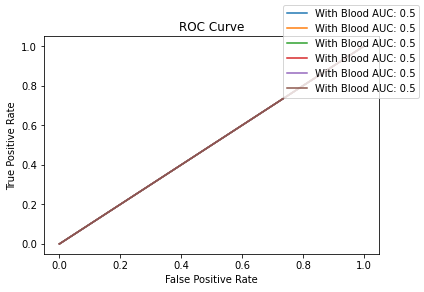

In [12]:
print("Logistic Regression")
my_logreg = LogisticRegression(max_iter=10000)
CrossValAndAUC(my_logreg)

Decision Tree
 CONTROL_blood_group_A+ | 10 Forld cross validation average: 0.9706372045220965
AUC :  0.5
 CONTROL_blood_group_A- | 10 Forld cross validation average: 0.975
AUC :  0.5
 CONTROL_blood_group_AB+ | 10 Forld cross validation average: 0.94512012012012
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_AB-
 CONTROL_blood_group_B+ | 10 Forld cross validation average: 0.9780888982812058
AUC :  0.5
 CONTROL_blood_group_B- | 10 Forld cross validation average: 0.99
AUC :  0.5
 CONTROL_blood_group_O+ | 10 Forld cross validation average: 0.9612995959805243
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_O-


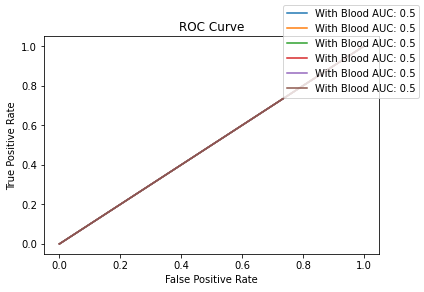

In [13]:
print("Decision Tree")
my_DecisionTree = DecisionTreeClassifier(random_state=4)
CrossValAndAUC(my_DecisionTree)

Random Forest Classifier
 CONTROL_blood_group_A+ | 10 Forld cross validation average: 0.9706628982528264
AUC :  0.5
 CONTROL_blood_group_A- | 10 Forld cross validation average: 0.975
AUC :  0.5
 CONTROL_blood_group_AB+ | 10 Forld cross validation average: 0.9451951951951951
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_AB-
 CONTROL_blood_group_B+ | 10 Forld cross validation average: 0.9780783319244858
AUC :  0.5
 CONTROL_blood_group_B- | 10 Forld cross validation average: 0.99
AUC :  0.5
 CONTROL_blood_group_O+ | 10 Forld cross validation average: 0.961333264270175
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_O-


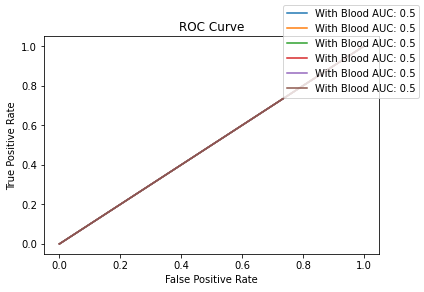

In [14]:
print("Random Forest Classifier")
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=4)
CrossValAndAUC(my_RandomForest)

Ada Boost Classifier
 CONTROL_blood_group_A+ | 10 Forld cross validation average: 0.9706474820143883
AUC :  0.5
 CONTROL_blood_group_A- | 10 Forld cross validation average: 0.9800000000000001
AUC :  0.5
 CONTROL_blood_group_AB+ | 10 Forld cross validation average: 0.94512012012012
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_AB-
 CONTROL_blood_group_B+ | 10 Forld cross validation average: 0.9780924204001128
AUC :  0.5
 CONTROL_blood_group_B- | 10 Forld cross validation average: 0.99
AUC :  0.5
 CONTROL_blood_group_O+ | 10 Forld cross validation average: 0.9613280845333059
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_O-


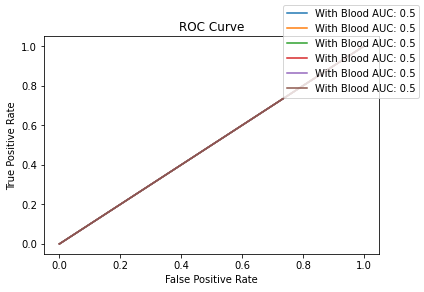

In [15]:
print("Ada Boost Classifier")
my_AdaBoost = AdaBoostClassifier(n_estimators=14, random_state=4)
CrossValAndAUC(my_AdaBoost)

SVM
 CONTROL_blood_group_A+ | 10 Forld cross validation average: 0.9706628982528261
AUC :  0.5
 CONTROL_blood_group_A- | 10 Forld cross validation average: nan
AUC :  0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 182, in fit
    y = self._validate_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 739, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one

 CONTROL_blood_group_AB+ | 10 Forld cross validation average: 0.9451951951951951
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_AB-
 CONTROL_blood_group_B+ | 10 Forld cross validation average: 0.9780924204001128
AUC :  0.5
 CONTROL_blood_group_B- | 10 Forld cross validation average: nan
AUC :  0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 182, in fit
    y = self._validate_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 739, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one

 CONTROL_blood_group_O+ | 10 Forld cross validation average: 0.9613306744017404
AUC :  0.5
Only Recovered samples for the CONTROL_blood_group_O-


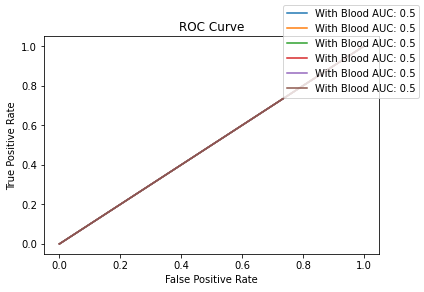

In [16]:
print("SVM")
my_svm = SVC(kernel='rbf', probability=True)
CrossValAndAUC(my_svm)